pandas.read_json(path_or_buf=None, orient=None, typ='frame', dtype=True, convert_axes=True, convert_dates=True, keep_default_dates=True, numpy=False, precise_float=False, date_unit=None)

In [23]:
import pandas as pd
page1 = pd.read_json('/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_1.json')
df1 = pd.DataFrame(page1["response"].ix["employers"])
df1.columns

Index(['careerOpportunitiesRating', 'ceo', 'compensationAndBenefitsRating',
       'cultureAndValuesRating', 'exactMatch', 'featuredReview', 'id',
       'industry', 'industryId', 'industryName', 'isEEP', 'name',
       'numberOfRatings', 'overallRating', 'ratingDescription',
       'recommendToFriendRating', 'sectorId', 'sectorName',
       'seniorLeadershipRating', 'squareLogo', 'website',
       'workLifeBalanceRating'],
      dtype='object')

In [49]:
def aggregateAllData():
    import pandas as pd
    filepaths = []
    file_dfs = []
    for x in range(1,3001):
        filepaths.append('/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_' + str(x) + '.json')
    for filename in filepaths:
        
        try:
            this_page = pd.read_json(filename)
            this_df = pd.DataFrame(this_page["response"].ix["employers"])
            file_dfs.append(this_df)
            print(filename)
        except:
            print("ERROR!!!")
            pass
        
    return pd.concat(file_dfs)

In [50]:
big_df = aggregateAllData()

/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_1.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_2.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_3.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_4.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_5.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_6.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_7.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_8.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_9.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_10.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_11.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_12.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_13.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerdata_14.json
/Users/jeffcoggshall/Dropbox/McNultyTeam1/data/employerda

In [55]:
#big_df.head(3)
big_df.shape

(29544, 23)

In [56]:
organized_df = pd.DataFrame(big_df[["name","industry","sectorName","overallRating","compensationAndBenefitsRating",
                                 "careerOpportunitiesRating","recommendToFriendRating","cultureAndValuesRating",
                                 "workLifeBalanceRating","seniorLeadershipRating","numberOfRatings"]])

In [57]:
clean_df = organized_df.dropna(how='any')

In [58]:
clean_df.shape

(29357, 11)

In [78]:
clean_df["numberOfRatings"].values

array([20241, 18695, 13343, ...,    49,    49,    49])

In [79]:
%pylab inline
from collections import Counter
ratingCounts = Counter(clean_df["numberOfRatings"].values)

Populating the interactive namespace from numpy and matplotlib


In [95]:
#np.array(ratingCounts)

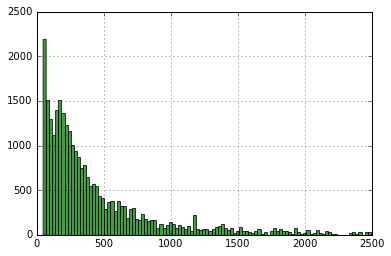

In [100]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = clean_df["numberOfRatings"].values
plt.hist(x, bins = 1000, facecolor='green', alpha=0.75)

# plt.xlabel('Numberof')
# plt.ylabel('Probability')
# plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
plt.xlim([0,2500])
plt.grid(True)

plt.show()

In [28]:
testdf = pd.DataFrame()

In [16]:
# df2_short = df2[["name","overallRating","numberOfRatings","ceo"]]


In [22]:
df1.head(2)

,careerOpportunitiesRating,ceo,compensationAndBenefitsRating,cultureAndValuesRating,exactMatch,featuredReview,id,industry,industryId,industryName,...,numberOfRatings,overallRating,ratingDescription,recommendToFriendRating,sectorId,sectorName,seniorLeadershipRating,squareLogo,website,workLifeBalanceRating
0,3.3,"{'pctApprove': 64, 'title': 'CEO', 'name': 'Do...",3.0,3.0,False,{'attributionURL': 'http://www.glassdoor.com/R...,715,General Merchandise & Superstores,200109.0,General Merchandise & Superstores,...,20241,3.1,OK,0.5,10022.0,Retail,2.7,https://media.glassdoor.com/sqll/715/walmart-s...,corporate.walmart.com,2.8
1,3.1,"{'pctApprove': 75, 'numberOfRatings': 3276, 'n...",3.1,3.4,False,{'attributionURL': 'http://www.glassdoor.com/R...,194,"Department, Clothing, & Shoe Stores",200105.0,"Department, Clothing, & Shoe Stores",...,18695,3.3,OK,0.6,10022.0,Retail,2.9,https://media.glassdoor.com/sqll/194/target-sq...,www.target.com,3.1


In [25]:
df12 = pd.concat([df1,df2])

In [27]:
df1.shape

(10, 22)

In [26]:
df12.shape

(20, 22)

In [17]:
organized_df.head(10)

,name,industry,sectorName,overallRating,compensationAndBenefitsRating,careerOpportunitiesRating,recommendToFriendRating,cultureAndValuesRating,workLifeBalanceRating,seniorLeadershipRating,numberOfRatings
0,Microsoft,Computer Hardware & Software,Information Technology,3.9,4.1,3.7,0.8,3.7,3.7,3.3,14074
1,Lowe's,Home Centers & Hardware Stores,Retail,3.5,3.5,3.3,0.7,3.4,3.0,3.0,9768
2,Starbucks,Fast-Food & Quick-Service Restaurants,"Restaurants, Bars & Food Services",3.8,3.8,3.4,0.8,4.0,3.4,3.2,10879
3,McDonald's,Fast-Food & Quick-Service Restaurants,"Restaurants, Bars & Food Services",3.2,2.5,3.0,0.5,2.9,3.0,2.7,10612
4,Hewlett-Packard,Computer Hardware & Software,Information Technology,3.3,3.1,2.9,0.5,3.2,3.4,2.6,15025
5,CVS Health,Health Care Services & Hospitals,Health Care,2.7,2.7,2.7,0.4,2.7,2.5,2.3,8076
6,Walgreens,Drug & Health Stores,Retail,3.1,3.0,2.9,0.5,3.0,2.9,2.7,8118
7,J.P. Morgan,Investment Banking & Asset Management,Finance,3.5,3.5,3.4,0.7,3.3,3.2,3.0,9426
8,Amazon.com,General Merchandise & Superstores,Retail,3.4,3.6,3.5,0.6,3.2,2.7,2.9,9553
9,US Air Force,Federal Agencies,Government,4.1,4.3,4.1,0.8,4.1,3.1,3.1,7883


In [5]:
df2["recommendToFriendRating"]

0    0.8
1    0.7
2    0.8
3    0.5
4    0.5
5    0.4
6    0.5
7    0.7
8    0.6
9    0.8
Name: recommendToFriendRating, dtype: object

In [6]:
ceo_df = pd.DataFrame(list(df2["ceo"]))

In [7]:
ceo_df

,image,name,numberOfRatings,pctApprove,pctDisapprove,title
0,"{'height': 200, 'width': 200, 'src': 'https://...",Satya Nadella,4139,93,7,CEO
1,"{'height': 200, 'width': 200, 'src': 'https://...",Robert A. Niblock,3510,72,28,Chairman and CEO
2,"{'height': 200, 'width': 200, 'src': 'https://...",Howard D. Schultz,6346,89,11,"Chairman, President, and CEO"
3,"{'height': 200, 'width': 200, 'src': 'https://...",Steve Easterbrook,1376,69,31,President and Chief Executive Officer
4,"{'height': 200, 'width': 200, 'src': 'https://...",Meg Whitman,5660,70,30,CEO
5,"{'height': 200, 'width': 200, 'src': 'https://...",Larry J. Merlo,2827,36,64,President and CEO
6,NaN,Stefano Pessina,1084,48,52,Executive Vice Chairman and Acting CEO
7,"{'height': 200, 'width': 200, 'src': 'https://...",Jamie Dimon,3816,87,13,"Chairman, President, and CEO"
8,"{'height': 200, 'width': 200, 'src': 'https://...",Jeff Bezos,5290,80,20,"Chairman, President, and CEO"
9,"{'height': 200, 'width': 200, 'src': 'https://...",General Mark A. Welsh,3000,83,17,Chief of Staff


In [8]:
df2_short = df2[["name","overallRating","numberOfRatings","ceo"]]

In [9]:
df2_short

,name,overallRating,numberOfRatings,ceo
0,Microsoft,3.9,14074,"{'pctApprove': 93, 'title': 'CEO', 'name': 'Sa..."
1,Lowe's,3.5,9768,"{'pctApprove': 72, 'title': 'Chairman and CEO'..."
2,Starbucks,3.8,10879,"{'pctApprove': 89, 'title': 'Chairman, Preside..."
3,McDonald's,3.2,10612,"{'pctApprove': 69, 'title': 'President and Chi..."
4,Hewlett-Packard,3.3,15025,"{'pctApprove': 70, 'title': 'CEO', 'name': 'Me..."
5,CVS Health,2.7,8076,"{'pctApprove': 36, 'title': 'President and CEO..."
6,Walgreens,3.1,8118,"{'pctApprove': 48, 'numberOfRatings': 1084, 'n..."
7,J.P. Morgan,3.5,9426,"{'pctApprove': 87, 'title': 'Chairman, Preside..."
8,Amazon.com,3.4,9553,"{'pctApprove': 80, 'title': 'Chairman, Preside..."
9,US Air Force,4.1,7883,"{'pctApprove': 83, 'title': 'Chief of Staff', ..."


In [10]:
shortceo = pd.concat([df2_short,ceo_df],axis=1)

In [11]:
shortceo

,name,overallRating,numberOfRatings,ceo,image,name,numberOfRatings,pctApprove,pctDisapprove,title
0,Microsoft,3.9,14074,"{'pctApprove': 93, 'title': 'CEO', 'name': 'Sa...","{'height': 200, 'width': 200, 'src': 'https://...",Satya Nadella,4139,93,7,CEO
1,Lowe's,3.5,9768,"{'pctApprove': 72, 'title': 'Chairman and CEO'...","{'height': 200, 'width': 200, 'src': 'https://...",Robert A. Niblock,3510,72,28,Chairman and CEO
2,Starbucks,3.8,10879,"{'pctApprove': 89, 'title': 'Chairman, Preside...","{'height': 200, 'width': 200, 'src': 'https://...",Howard D. Schultz,6346,89,11,"Chairman, President, and CEO"
3,McDonald's,3.2,10612,"{'pctApprove': 69, 'title': 'President and Chi...","{'height': 200, 'width': 200, 'src': 'https://...",Steve Easterbrook,1376,69,31,President and Chief Executive Officer
4,Hewlett-Packard,3.3,15025,"{'pctApprove': 70, 'title': 'CEO', 'name': 'Me...","{'height': 200, 'width': 200, 'src': 'https://...",Meg Whitman,5660,70,30,CEO
5,CVS Health,2.7,8076,"{'pctApprove': 36, 'title': 'President and CEO...","{'height': 200, 'width': 200, 'src': 'https://...",Larry J. Merlo,2827,36,64,President and CEO
6,Walgreens,3.1,8118,"{'pctApprove': 48, 'numberOfRatings': 1084, 'n...",NaN,Stefano Pessina,1084,48,52,Executive Vice Chairman and Acting CEO
7,J.P. Morgan,3.5,9426,"{'pctApprove': 87, 'title': 'Chairman, Preside...","{'height': 200, 'width': 200, 'src': 'https://...",Jamie Dimon,3816,87,13,"Chairman, President, and CEO"
8,Amazon.com,3.4,9553,"{'pctApprove': 80, 'title': 'Chairman, Preside...","{'height': 200, 'width': 200, 'src': 'https://...",Jeff Bezos,5290,80,20,"Chairman, President, and CEO"
9,US Air Force,4.1,7883,"{'pctApprove': 83, 'title': 'Chief of Staff', ...","{'height': 200, 'width': 200, 'src': 'https://...",General Mark A. Welsh,3000,83,17,Chief of Staff


In [12]:
!ls
!cd Dropbox

GlassdoorData.ipynb   Scraping_Indeed.ipynb
JSON Reading.ipynb    first50.pkl
/bin/sh: line 0: cd: Dropbox: No such file or directory
